In [850]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [851]:
#определение основных функций

def limits (column):
    iqr = students[column].quantile(0.75) - students[column].quantile(0.25)
    q25 = students[column].quantile(0.25)
    q75 = students[column].quantile(0.75)
    print('25-й квантиль: {},'.format(q25), '75-й квантиль: {},'.format(q75)
      , "IQR: {}, ".format(iqr),"Границы выбросов: [{f}, {l}].".format(f=q25 - 1.5*iqr, l=q75 + 1.5*iqr))

In [852]:
students = pd.read_csv('stud_math.csv')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [853]:
display(students.head(10))
students.info()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

<h4> Датафрейм содержит 395 строк и 30 столбцов. Сразу видно, что во многих столбцах есть пропущенные данные. 13 столбцов содержат числовые значения, 17 - строковые. </h4> 

In [854]:
pd.DataFrame(students.school.value_counts())

school
GP     349
MS      46

<h4> Всего в выборке участвует 2 школы, большая часть учеников (88%) обучается в GP. Скорее всего, данный параметр не будет влиять на оценки. Пропущенных значений нет</h4> 

In [855]:
pd.DataFrame(students.sex.value_counts())

sex
F  208
M  187

<h4> Большую часть выборки составляют мальчики. В столбце с полом ребенка также нет пропусков </h4> 

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

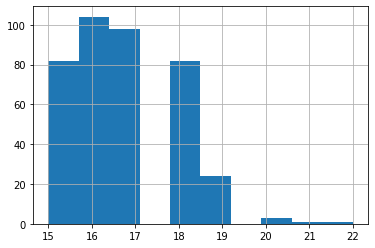

In [856]:
students.age.hist()
students.age.describe()

<h4> в столбце с возрастом учеников также нет пропусков, средний возраст составляет 16,7 лет. Есть 5 записей со значениями возраста учеников более 20 лет. Возможно является выбросами. Далее следует проверка </h4>

In [857]:
'''показать данные с подозрительными возрастами'''
students[(students.age >= 20)]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
247     GP   M   22       U     GT3       T   3.0   1.0  services  services   
306     GP   M   20       U     GT3       A   3.0   2.0  services     other   
376     MS   F   20     NaN     GT3       T   4.0   2.0    health     other   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
247   other   mother         1.0        1.0       3.0        no     no   no   
306  course    other         1.0        1.0       0.0        no     no   no   
376  course      NaN         2.0        3.0       2.0        no    yes  yes   
390  course      NaN         1.0        2.0       2.0        no    yes  yes   
392  course      NaN         1.0        1.0       3.0       NaN     no   no   

    activities nursery  studytime, granular higher internet romantic  famrel  \
247         no      no                 -3.0     no      yes      yes     5.0   
306        yes     yes                 -3.0    yes       no       no     5.0   
376         no      no                 -9.0    yes      yes      yes     5.0   
390         no     yes                 -6.0    yes       no       no     5.0   
392         no      no                 -3.0    NaN       no       no     5.0   

     freetime  goout  health  absences  score  
247       4.0    5.0     1.0      16.0   40.0  
306       5.0    3.0     5.0       0.0   90.0  
376       4.0    3.0     3.0       4.0   75.0  
390       5.0    4.0     4.0     212.0   45.0  
392       5.0    3.0     3.0       3.0   35.0

In [858]:
limits('age')

25-й квантиль: 16.0, 75-й квантиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


<h4> Таким образом, в столбце присутствует 1 выброс - значение 22 года. Таким образом в датафрейме становится на 1 строку меньше </h4>

In [859]:
students = students.loc[students.age <= 21]

In [860]:
students.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
address    377 non-null object
dtypes: object(1)
memory usage: 6.2+ KB


In [863]:
students.address = students.address.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [864]:
students.address = students.address.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

<h4> заполнили пустые значения столбца адреса значением None. Хотя большую часть адресов составляют U, нельзя с большой долей веротяности заполнить пустые строки значением U </h4>

In [865]:
students.address.value_counts()

U       294
R        83
None     17
Name: address, dtype: int64

In [866]:
students.loc[:, ['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
famsize    367 non-null object
dtypes: object(1)
memory usage: 6.2+ KB


In [868]:
students.famsize = students.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)
students.famsize = students.famsize.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [869]:
students.famsize.value_counts()

GT3     260
LE3     107
None     27
Name: famsize, dtype: int64

<h4> В датафрейме присутствует два типа семей (меньше 3 и больше 3 человек), преимущественну. часть составляют семьи, где 3 и менее человек, то есть в большинстве семей либо только один ребенок, либо родители могут быть в разводе </h4>

In [870]:
students.loc[:, ['Pstatus']].info()
pd.DataFrame(students.Pstatus.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    349 non-null object
dtypes: object(1)
memory usage: 6.2+ KB


Pstatus
T      313
A       36

In [872]:
students.Pstatus = students.Pstatus.astype(str).apply(lambda x: None if x == '' else x.strip())
students.Pstatus = students.Pstatus.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

<h4>Так как установлено, что большая часть родителей живет совместно, а в предыдущем пункте выяснено, что большинство семей состоит из 3 человек, то можно сделать вывод о том, что в большинстве семей только 1 ребенок. В теории, можно попробовать добавить фичу, дополнительный столб, в котором указать предполагаемое кл-во детей в семье. Так как у нас есть статус родителей (вместе-раздельно) и размер семьи, то, например, при условии, что родители живут вместе и в семье 3 или меньше человек, то в семье только 1 ребенок и так далее. Но есть некоторые тонкости. Например, родители могут жыть раздельно и в семье может быть больше 3 человек, тогда не ясно точное кол-во детей в семье, ясно только то, что ребенок - не единственный или родители могут быть вразводе и в семье 3 или меньше человек, значит неясно 100% один или два ребенка.</h4>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
Medu    391 non-null float64
dtypes: float64(1)
memory usage: 6.2 KB


4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: Medu, dtype: int64

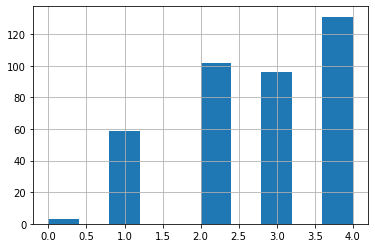

In [873]:
students.loc[:, ['Medu']].info()
students.Medu.describe()
students.Medu.hist()
students.Medu.value_counts()

In [875]:
median = students.Medu.median()
students.Medu = students.Medu.apply(lambda x: median if pd.isnull(x) else median if x == 'nan' else x)

In [876]:
students.Medu.value_counts()

4.0    131
2.0    102
3.0     99
1.0     59
0.0      3
Name: Medu, dtype: int64

<h4> Так как незаполненными являются всего 3 значения и, чтобы не уменьшать размер датафрейма, на место пустых значений поставлены медианные значения касаемо образования матери </h4>

In [877]:
students.loc[:, ['Fedu']].info()
display(students.Fedu.describe())
students.Fedu.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
Fedu    370 non-null float64
dtypes: float64(1)
memory usage: 6.2 KB


count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [878]:
# значение 40 - является выбросом, так как оценка идет по 4-х бальной шкале. Значение удаляем
students = students.loc[students['Fedu'] != 40]

In [879]:
display(students.Fedu.describe())
students.loc[:, ['Fedu']].info()

count    369.000000
mean       2.517615
std        1.086147
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Fedu    369 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [881]:
# замена пустых значений на медианные, округленные до целого числа

median_fedu = students.Fedu.median()
students.Fedu = students.Fedu.apply(lambda x: median_fedu if x == '' else x)
students.Fedu = students.Fedu.apply(lambda x: median_fedu if pd.isnull(x) else median_fedu if x == 'nan' else x)

In [882]:
students.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Fedu    393 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


<h4> В выборке был один выброс - значение 40. Так как интервал оценки образования отца от 0 до 4, то данное число - выброс. Оставшиеся пустые значения заполнены медианным значением уровня образования отцов по всей выборке </h4>

In [883]:
students.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Mjob    374 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [885]:
students.Mjob = students.Mjob.astype(str).apply(lambda x: None if x == '' else x.strip())
students.Mjob = students.Mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [886]:
students.loc[:, ['Mjob']].info()
students.Mjob.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Mjob    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


other       133
services     96
at_home      58
teacher      55
health       32
None         19
Name: Mjob, dtype: int64

In [887]:
students.loc[:, ['Fjob']].info()
students.Fjob.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Fjob    357 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


other       196
services    101
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [889]:
students.Fjob = students.Fjob.astype(str).apply(lambda x: None if x == '' else x.strip())
students.Fjob = students.Fjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [890]:
students.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Fjob    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


<h4> В данных по работей мам и пап учеников есть пропуски, значения текстовые, поэтому логичным будет заменить пропуски на None, так как нет такого значения, которое с наибольшей вероятностью можно было бы подскавить на место пропусков </h4>

In [891]:
students.loc[:, ['reason']].info()
students.reason.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
reason    376 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


course        137
home          104
reputation    102
other          33
Name: reason, dtype: int64

In [894]:
students.reason = students.reason.astype(str).apply(lambda x: None if x == '' else x.strip())

In [895]:
students.reason = students.reason.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [896]:
students.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
reason    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [897]:
students.loc[:, ['guardian']].info()
students.guardian.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
guardian    362 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


mother    249
father     85
other      28
Name: guardian, dtype: int64

In [900]:
students.guardian = students.guardian.astype(str).apply(lambda x: None if x == '' else x.strip())

In [901]:
students.guardian = students.guardian.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [902]:
students.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
guardian    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


<h4> Пустые ячейки заменены на None </h4>

1.0    241
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

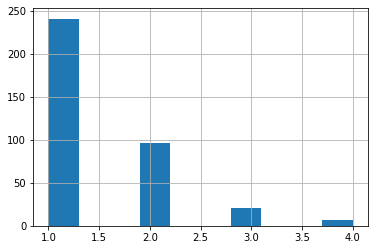

In [903]:
students.traveltime.hist()
students.traveltime.value_counts()

In [904]:
students.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
traveltime    365 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [905]:
students.traveltime.describe()

count    365.000000
mean       1.435616
std        0.690869
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [906]:
students.traveltime.value_counts()

1.0    241
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [907]:
median = students.traveltime.median()

In [909]:
students.traveltime = students.traveltime.apply(lambda x: median if pd.isnull(x) else median if x == 'nan' 
                                               else median if x == '' else x)

<h4> Пустые значения времени в школу заполнены на медианные, выбросов нет </h4>

In [910]:
students.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
studytime    386 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [911]:
students.studytime.describe()

count    386.000000
mean       2.038860
std        0.841176
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [912]:
students.studytime.value_counts()

2.0    194
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

In [913]:
median = students.studytime.median()

In [915]:
students.studytime = students.studytime.apply(lambda x: median if pd.isnull(x) else median if x == 'nan' 
                                               else median if x == '' else x)

<h4> Пустые значения времени учебы заполнены на медианные, выбросов нет </h4>

In [916]:
students.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
failures    371 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [917]:
students.failures.value_counts()

0.0    292
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64

In [918]:
students.failures.describe()

count    371.000000
mean       0.331536
std        0.731937
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [919]:
median = students.failures.median()

In [921]:
students.failures = students.failures.apply(lambda x: median if pd.isnull(x) else median if x == 'nan' 
                                               else median if x == '' else x)

<h4> Пустые значения внеучебных неудач заполнены на медианные, выбросов нет </h4>

In [922]:
students.schoolsup.value_counts()

no     333
yes     51
Name: schoolsup, dtype: int64

In [923]:
pd.DataFrame(students.schoolsup).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    384 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [926]:
students.schoolsup = students.schoolsup.astype(str).apply(lambda x: 'no' if pd.isnull(x) else None if x == 'nan'
                                              else None if x == '' else x.strip())

In [927]:
students.schoolsup = students.schoolsup.astype(str).apply(lambda x: 'no' if x == 'None'
                                              else x.strip())

In [928]:
students.famsup.value_counts()

yes    218
no     136
Name: famsup, dtype: int64

In [929]:
pd.DataFrame(students.famsup).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
famsup    354 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [931]:
students.famsup = students.famsup.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                              else None if x == '' else x.strip())

<h4 >Пустые значения в столбце про дополнительную семейную образовательную поддержку заменены на None. Так как большая часть значений (более 80%) про доп школьное образование является - "нет", то в пропущенные значения также добавлен ответ "нет"  </h4>

In [932]:
pd.DataFrame(students.paid).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
paid    353 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [933]:
students.paid.value_counts()

no     198
yes    155
Name: paid, dtype: int64

In [935]:
students.paid = students.paid.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                              else None if x == 'Nan' else None if x == '' else x.strip())

In [936]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

In [937]:
pd.DataFrame(students.activities).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
activities    379 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [938]:
students.activities.value_counts()

yes    194
no     185
Name: activities, dtype: int64

In [940]:
students.activities = students.activities.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                              else None if x == 'Nan' else None if x == '' else x.strip())

In [941]:
pd.DataFrame(students.activities).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
activities    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [942]:
pd.DataFrame(students.nursery).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
nursery    377 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [943]:
students.nursery.value_counts()

yes    299
no      78
Name: nursery, dtype: int64

In [945]:
students.nursery = students.nursery.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                              else None if x == 'Nan' else None if x == '' else x.strip())

In [946]:
pd.DataFrame(students.nursery).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
nursery    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [947]:
pd.DataFrame(students.higher).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
higher    373 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [948]:
students.higher.value_counts()

yes    355
no      18
Name: higher, dtype: int64

In [950]:
students.higher = students.higher.astype(str).apply(lambda x: 'yes' if pd.isnull(x) else 'yes' if x == 'nan'
                                              else 'yes' if x == 'Nan' else 'yes' if x == '' else x.strip())

In [951]:
students.higher.value_counts()

yes    375
no      18
Name: higher, dtype: int64

In [952]:
pd.DataFrame(students.higher).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
higher    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [953]:
pd.DataFrame(students.internet).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
internet    359 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [954]:
students.internet.value_counts()

yes    303
no      56
Name: internet, dtype: int64

In [955]:
students.internet = students.internet.astype(str).apply(lambda x: 'yes' if pd.isnull(x) else 'yes' if x == 'nan'
                                              else 'yes' if x == 'Nan' else 'yes' if x == '' else x.strip())

In [956]:
pd.DataFrame(students.internet).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
internet    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [957]:
pd.DataFrame(students.romantic).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
romantic    362 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


In [958]:
students.romantic.value_counts()

no     239
yes    123
Name: romantic, dtype: int64

In [960]:
students.romantic = students.romantic.astype(str).apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                              else None if x == 'Nan' else None if x == '' else x.strip())

In [961]:
pd.DataFrame(students.romantic).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
romantic    393 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


<h4> в текстовых столбцах пустые значения заменены на None или на наиболее часто встречаемые значения (в случае со столбцом интернет) </h4>

In [962]:
pd.DataFrame(students.famrel).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
famrel    366 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [963]:
students.famrel.value_counts()

 4.0    182
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [964]:
students = students.loc[students.famrel != -1]

In [965]:
students.famrel.describe()

count    365.000000
mean       3.945205
std        0.890894
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [966]:
median = students.famrel.median()

In [968]:
students.famrel = students.famrel.astype(float).apply(lambda x: median if pd.isnull(x) else median if x == 'nan'
                                              else median if x == 'Nan' else median if x == '' else x)

In [969]:
pd.DataFrame(students.famrel).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
famrel    392 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


<h4> В графе семейных отнощений был один выброс (отрицательное значение) - удален из ДФ. </h4>

In [970]:
pd.DataFrame(students.freetime).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
freetime    381 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [971]:
students.freetime.describe()

count    381.000000
mean       3.236220
std        0.993055
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [972]:
median = students.freetime.median()

In [974]:
students.freetime = students.freetime.astype(float).apply(lambda x: median if pd.isnull(x) else median if x == 'nan'
                                              else median if x == 'Nan' else median if x == '' else x)

In [975]:
students.freetime.describe()

count    392.000000
mean       3.229592
std        0.979766
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [976]:
pd.DataFrame(students.goout).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
goout    384 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [977]:
students.goout.describe()

count    384.000000
mean       3.106771
std        1.113204
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [978]:
students.goout.value_counts()

3.0    127
2.0     99
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

In [979]:
median = students.goout.median()

In [980]:
students.goout = students.goout.apply(lambda x: median if pd.isnull(x) else median if x == 'nan'
                                              else median if x == 'Nan' else median if x == '' else x)

In [981]:
students.goout.value_counts()

3.0    135
2.0     99
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

In [982]:
pd.DataFrame(students.health).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
health    377 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [983]:
students.health.describe()

count    377.000000
mean       3.533156
std        1.393216
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [984]:
median = students.health.median()

In [987]:
students.health = students.health.apply(lambda x: median if pd.isnull(x) else median if x == 'nan'
                                              else median if x == 'Nan' else median if x == '' else x)

In [988]:
pd.DataFrame(students.absences).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
absences    380 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


count    380.000000
mean       7.247368
std       23.550471
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

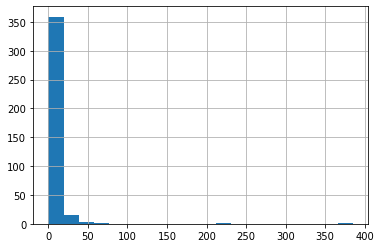

In [989]:
students.absences.hist(bins = 20)
students.absences.describe()

In [990]:
limits('absences')

25-й квантиль: 0.0, 75-й квантиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [993]:
median = students.absences.median()

In [997]:
students.absences = students.absences.apply(lambda x: median if pd.isnull(x) else median if x == 'nan'
                                              else median if x == 'Nan' else median if x == '' else x)

In [995]:
students = students.loc[students.absences.between(0, 20)]

In [998]:
students.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  375.000000  375.000000  375.000000  375.000000  375.000000  375.000000   
mean    16.656000    2.736000    2.469333    1.402667    2.048000    0.298667   
std      1.237368    1.105243    1.069006    0.682472    0.841974    0.710030   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     21.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout      health    absences       score  
count  375.000000  375.000000  375.000000  375.000000  375.000000  369.000000  
mean     3.954667    3.256000    3.106667    3.568000    4.530667   52.276423  
std      0.862513    0.966586    1.096584    1.362225    4.846135   23.145206  
min      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000  
25%      4.000000    3.000000    2.000000    3.000000    0.000000   40.000000  
50%      4.000000    3.000000    3.000000    4.000000    4.000000   55.000000  
75%      4.500000    4.000000    4.000000    5.000000    6.000000   70.000000  
max      5.000000    5.000000    5.000000    5.000000   20.000000  100.000000

<h4> Выбросы удалены, пропуски заполнены медианными значениями </h4>

count    369.000000
mean      52.276423
std       23.145206
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

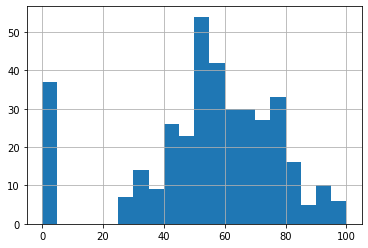

In [999]:
students.score.hist(bins = 20)
students.score.describe()

In [1000]:
limits('score')

25-й квантиль: 40.0, 75-й квантиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [1002]:
pd.DataFrame(students.score).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 394
Data columns (total 1 columns):
score    369 non-null float64
dtypes: float64(1)
memory usage: 5.9 KB


In [1003]:
students.score.describe()

count    369.000000
mean      52.276423
std       23.145206
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [1004]:
median = students.score.median()

55.0

In [1005]:
students.score = students.score.apply(lambda x: median if pd.isnull(x) else median if x == 'nan'
                                              else median if x == 'Nan' else median if x == '' else x)

In [1006]:
students.score.describe()

count    375.000000
mean      52.320000
std       22.961349
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [1008]:
students.head(20)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U    None       A   4.0   4.0   at_home   teacher   
1      GP   F   17       U     GT3    None   1.0   1.0   at_home     other   
2      GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3      GP   F   15       U     GT3       T   4.0   2.0    health      None   
4      GP   F   16       U     GT3       T   3.0   3.0     other     other   
5      GP   M   16       U     LE3       T   4.0   3.0  services     other   
6      GP   M   16    None     LE3       T   2.0   2.0     other     other   
7      GP   F   17       U     GT3       A   4.0   4.0     other   teacher   
8      GP   M   15       U     LE3       A   3.0   2.0  services     other   
9      GP   M   15       U    None    None   3.0   4.0     other     other   
10     GP   F   15       U     GT3       T   4.0   4.0   teacher    health   
12     GP   M   15       U     LE3       T   4.0   4.0    health  services   
13     GP   M   15       U     GT3       T   4.0   3.0   teacher     other   
14     GP   M   15       U     GT3       A   2.0   2.0     other     other   
15     GP   F   16       U     GT3    None   4.0   4.0    health     other   
16     GP   F   16       U     GT3       T   4.0   4.0  services  services   
17     GP   F   16       U     GT3       T   3.0   3.0     other      None   
18     GP   M   17       U     GT3       T   3.0   2.0  services  services   
19     GP   M   16       U     LE3       T   4.0   3.0    health     other   
20     GP   M   15       U     GT3       T   4.0   3.0   teacher     other   

        reason guardian  traveltime  studytime  failures schoolsup famsup  \
0       course   mother         2.0        2.0       0.0       yes     no   
1       course   father         1.0        2.0       0.0        no    yes   
2        other   mother         1.0        2.0       3.0       yes     no   
3         home   mother         1.0        3.0       0.0        no    yes   
4         home   father         1.0        2.0       0.0        no    yes   
5   reputation   mother         1.0        2.0       0.0        no    yes   
6         home   mother         1.0        2.0       0.0        no     no   
7         home   mother         2.0        2.0       0.0       yes    yes   
8         home   mother         1.0        2.0       0.0        no    yes   
9         home   mother         1.0        2.0       0.0        no    yes   
10  reputation   mother         1.0        2.0       0.0        no    yes   
12      course   father         1.0        1.0       0.0        no    yes   
13      course   mother         2.0        2.0       0.0        no    yes   
14        home    other         1.0        3.0       0.0        no    yes   
15        home   mother         1.0        1.0       0.0        no    yes   
16  reputation   mother         1.0        3.0       0.0        no    yes   
17  reputation   mother         3.0        2.0       0.0       yes   None   
18      course   mother         1.0        1.0       3.0        no    yes   
19        home   father         1.0        1.0       0.0        no     no   
20  reputation   mother         1.0        2.0       0.0        no     no   

    paid activities nursery higher internet romantic  famrel  freetime  goout  \
0     no         no     yes    yes      yes       no     4.0       3.0    4.0   
1     no         no      no    yes      yes       no     5.0       3.0    3.0   
2   None         no     yes    yes      yes     None     4.0       3.0    2.0   
3    yes        yes     yes    yes      yes      yes     3.0       2.0    2.0   
4    yes         no     yes    yes       no       no     4.0       3.0    2.0   
5    yes        yes     yes    yes      yes       no     5.0       4.0    2.0   
6     no         no     yes    yes      yes       no     4.0       4.0    4.0   
7     no         no     yes    yes       no       no     4.0       1.0    4.0   
8    yes         

<h4> Первичный анализ данных в столбцах завершен. Выбросы удалены, пустые значения заменены на средние, медианные или None. Приступаю к корреляционному анализу </h4>

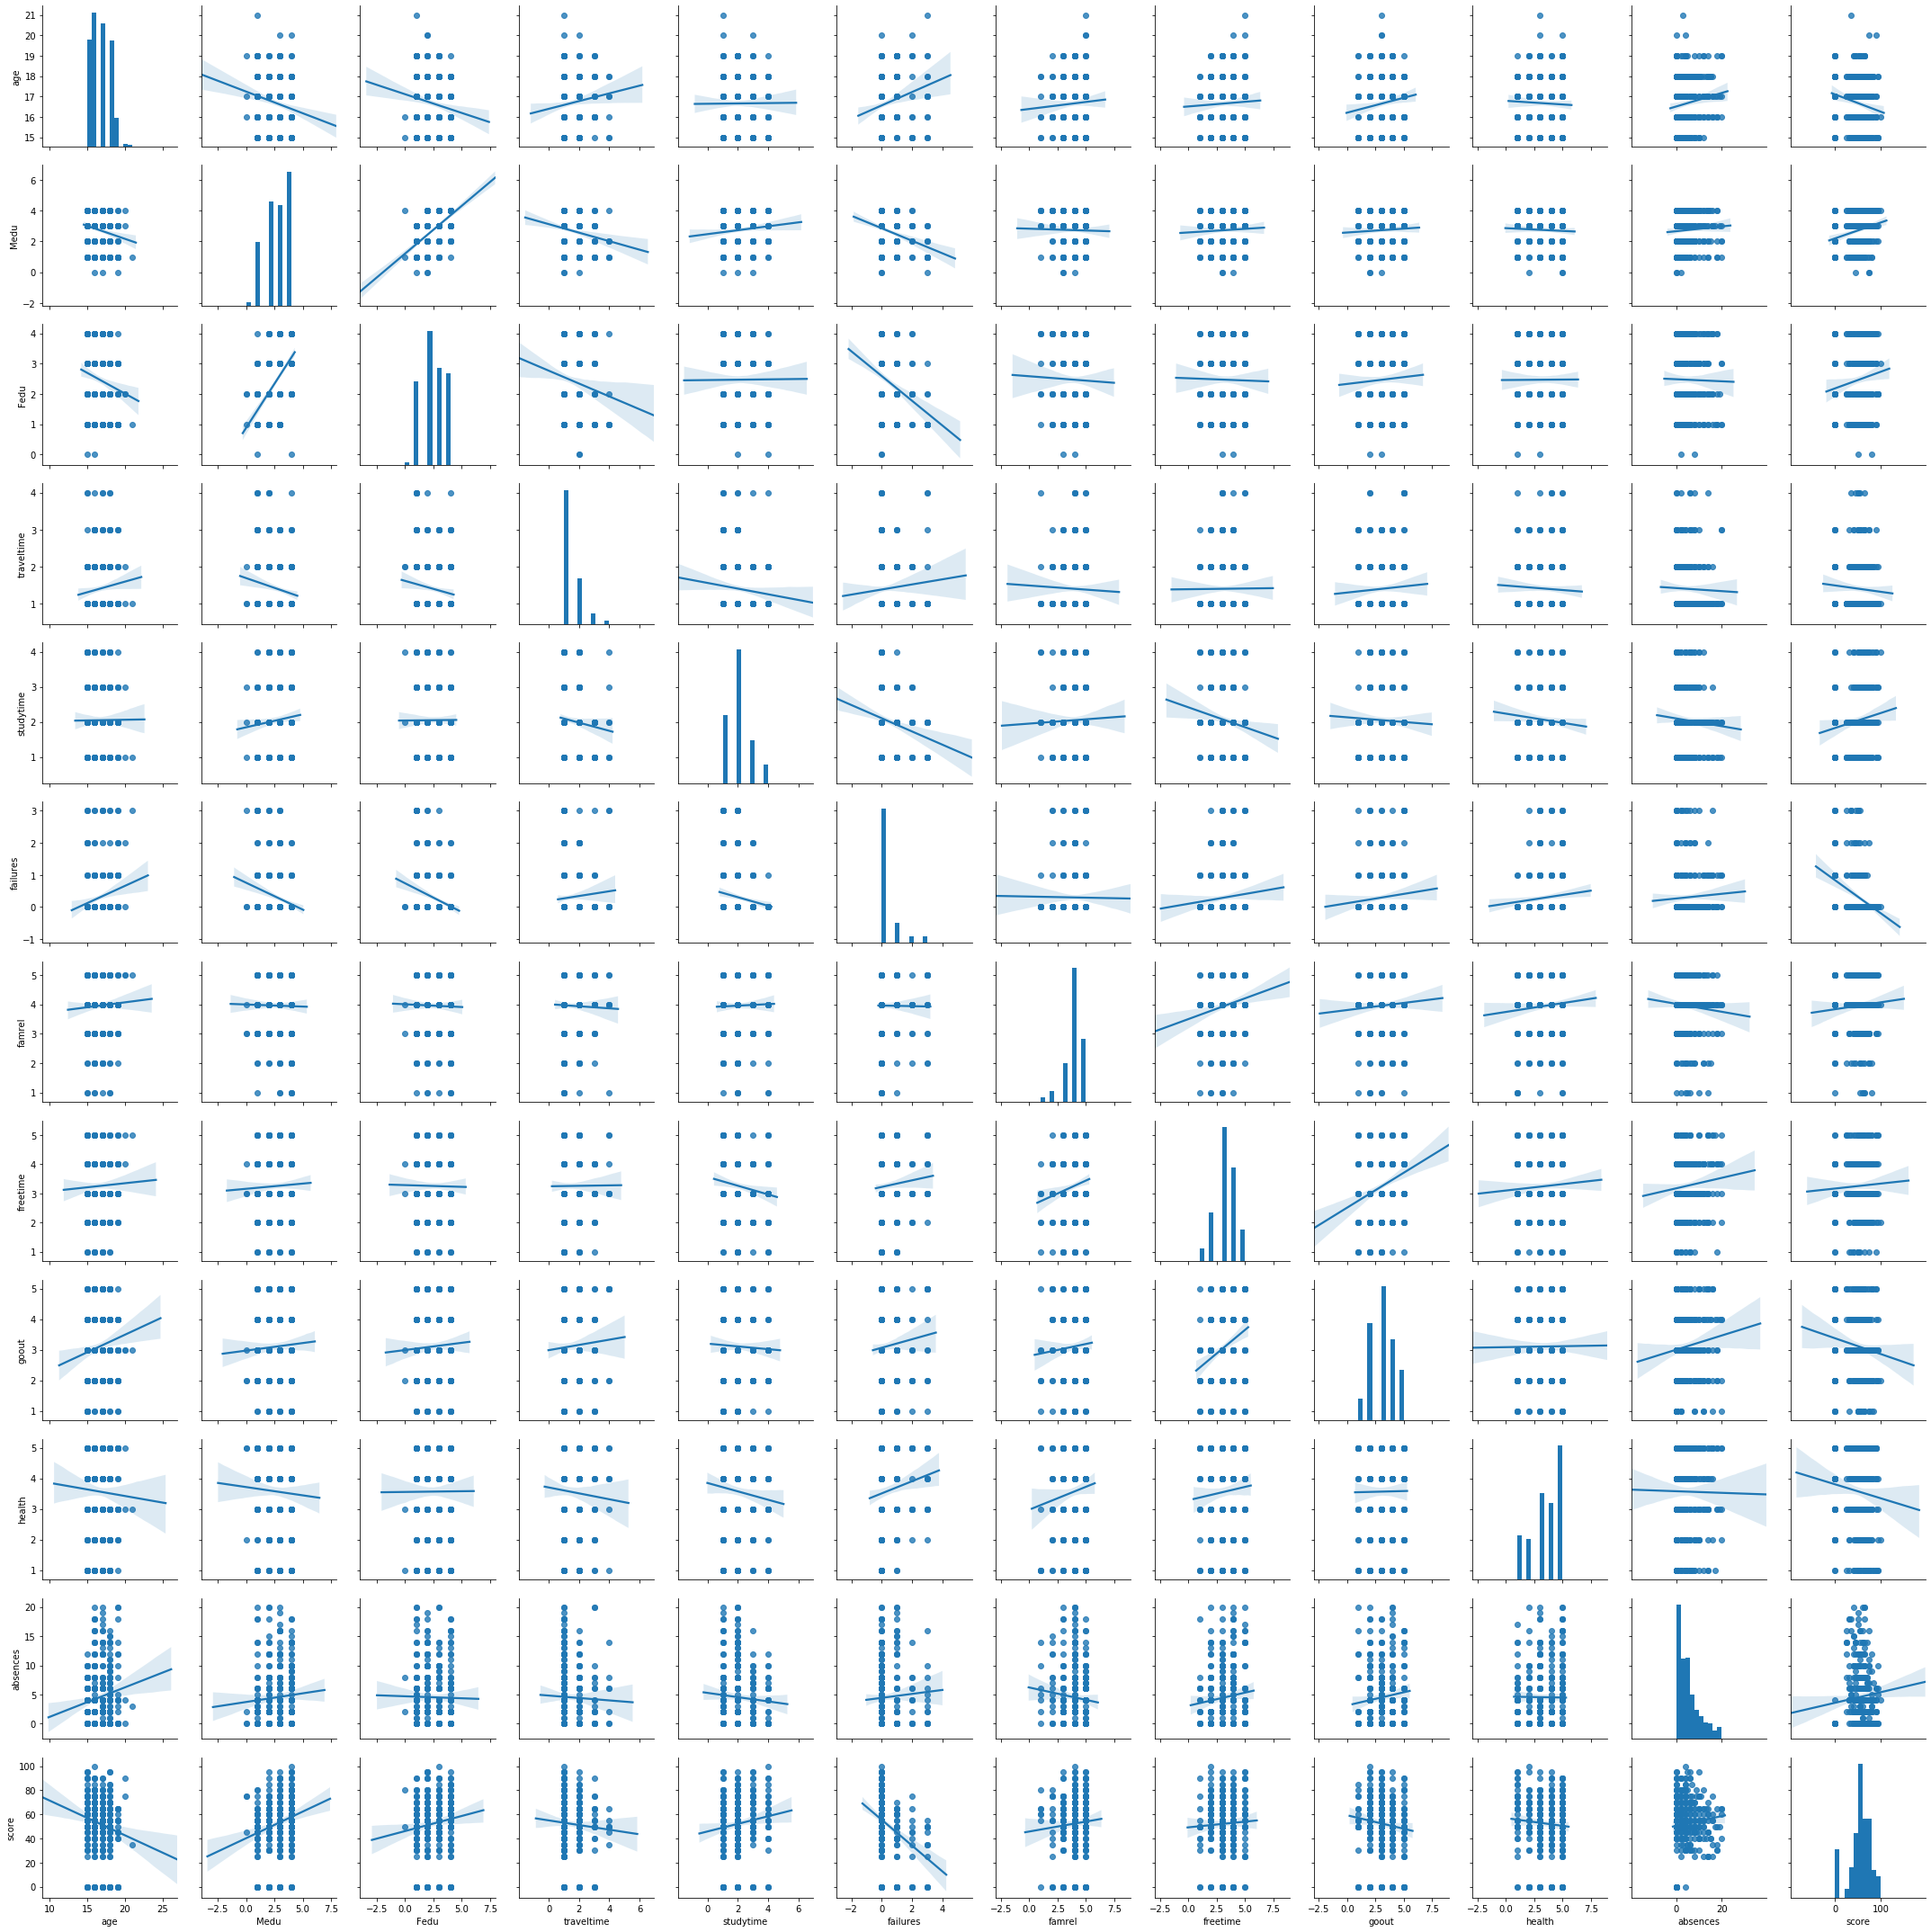

In [1009]:
sns.pairplot(students, kind = 'reg')

In [1010]:
students.corr()

age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.189755 -0.158590    0.104309   0.005626  0.187252   
Medu       -0.189755  1.000000  0.600753   -0.170630   0.096978 -0.260417   
Fedu       -0.158590  0.600753  1.000000   -0.135123   0.004610 -0.269714   
traveltime  0.104309 -0.170630 -0.135123    1.000000  -0.094217  0.071187   
studytime   0.005626  0.096978  0.004610   -0.094217   1.000000 -0.158220   
failures    0.187252 -0.260417 -0.269714    0.071187  -0.158220  1.000000   
famrel      0.047982 -0.018198 -0.023261   -0.027956   0.025095 -0.008394   
freetime    0.035823  0.040906 -0.013083    0.005448  -0.130128  0.083092   
goout       0.129583  0.049770  0.046135    0.053210  -0.034519  0.089469   
health     -0.039226 -0.043986  0.003731   -0.048225  -0.084446  0.103345   
absences    0.129513  0.067660 -0.015173   -0.029209  -0.063270  0.049394   
score      -0.155818  0.212792  0.116739   -0.057214   0.115240 -0.329622   

              famrel  freetime     goout    health  absences     score  
age         0.047982  0.035823  0.129583 -0.039226  0.129513 -0.155818  
Medu       -0.018198  0.040906  0.049770 -0.043986  0.067660  0.212792  
Fedu       -0.023261 -0.013083  0.046135  0.003731 -0.015173  0.116739  
traveltime -0.027956  0.005448  0.053210 -0.048225 -0.029209 -0.057214  
studytime   0.025095 -0.130128 -0.034519 -0.084446 -0.063270  0.115240  
failures   -0.008394  0.083092  0.089469  0.103345  0.049394 -0.329622  
famrel      1.000000  0.158280  0.061666  0.094796 -0.075469  0.062029  
freetime    0.158280  1.000000  0.271834  0.061879  0.089649  0.040031  
goout       0.061666  0.271834  1.000000  0.007661  0.102024 -0.107020  
health      0.094796  0.061879  0.007661  1.000000 -0.009329 -0.076436  
absences   -0.075469  0.089649  0.102024 -0.009329  1.000000  0.085383  
score       0.062029  0.040031 -0.107020 -0.076436  0.085383  1.000000

<h4> Нет однозначной и достоверной корреляции параметра score с любым другим параметром, что может говорить о скрытых зависимостях или о наличии сложной связи с несколькими параметрами одновременно. Наибольшая корреляция результата теста наблюдается со значениями образования матери и количеством внеучебных ошибок (обратная зависимость), тем не менее зависимости достаточно слабо прослеживаются. Для модели возьмем параметры, значения коэффициента корреляции которых по модулю более 0,1 </h4>

In [1013]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

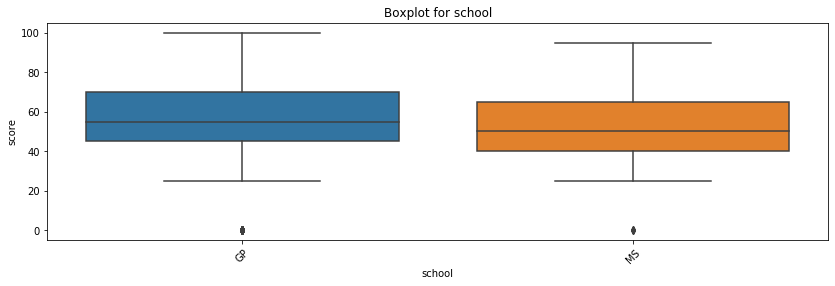

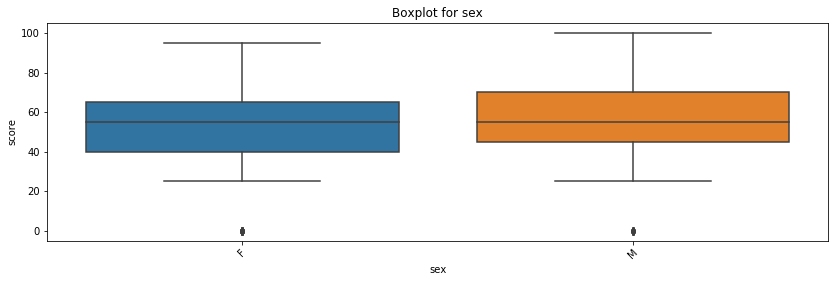

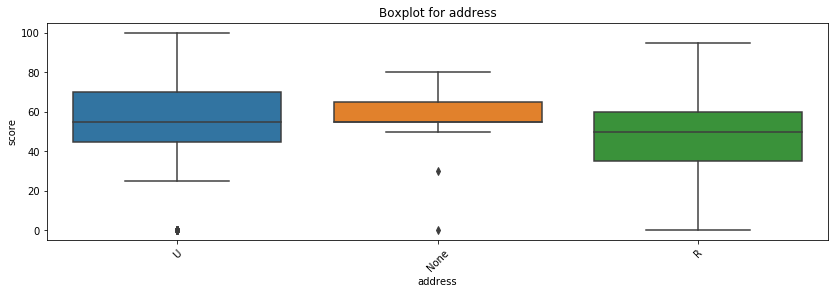

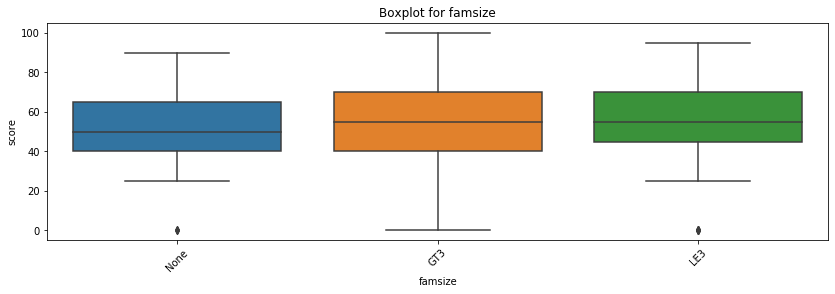

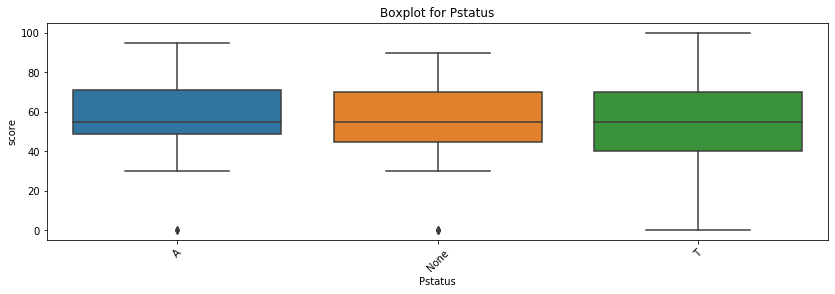

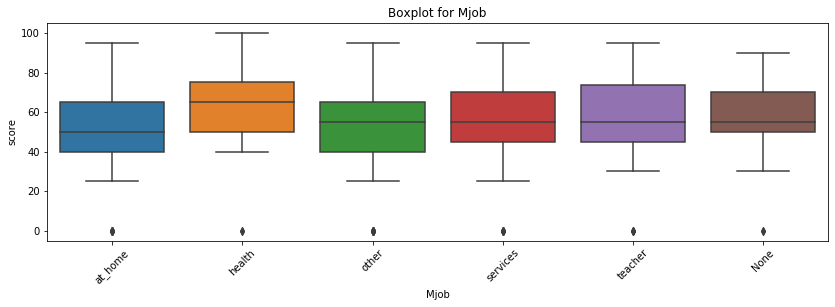

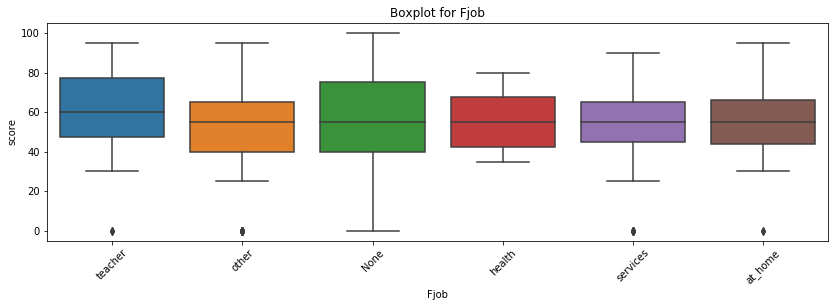

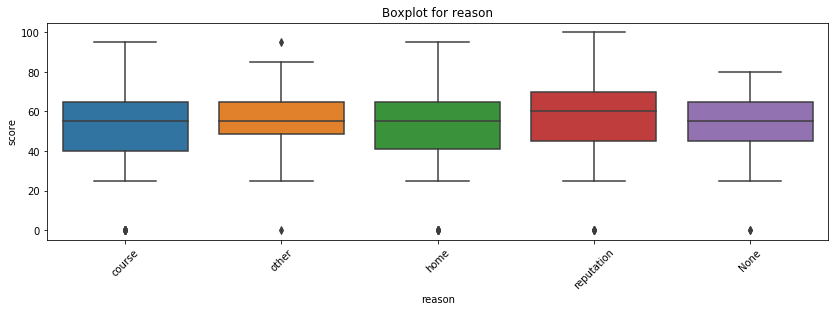

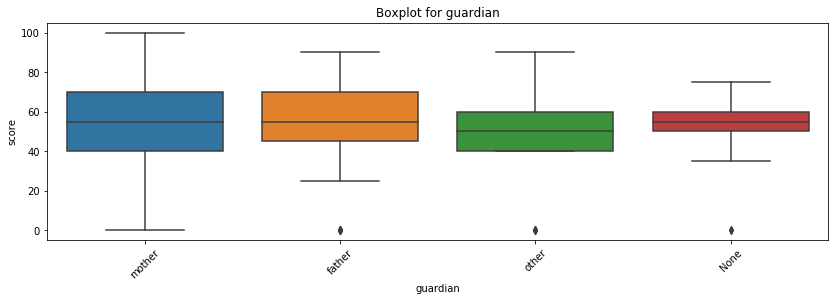

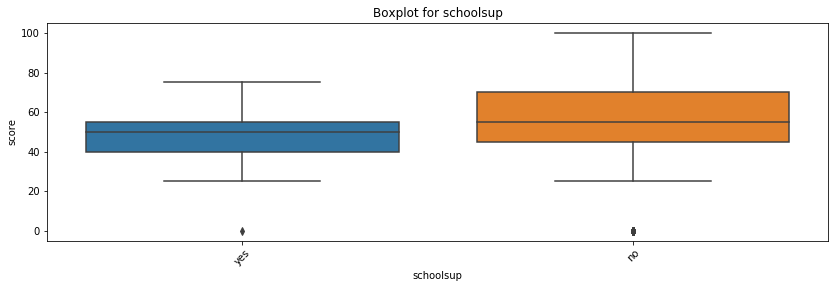

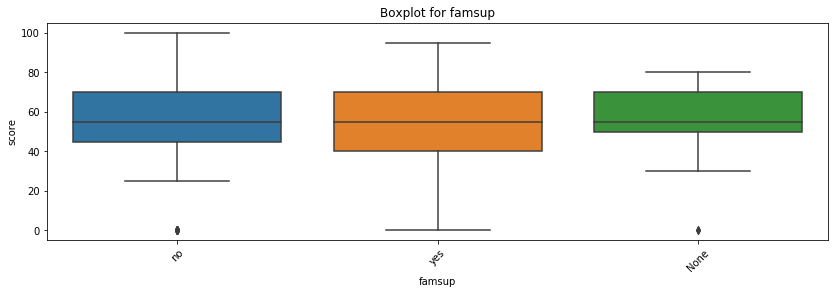

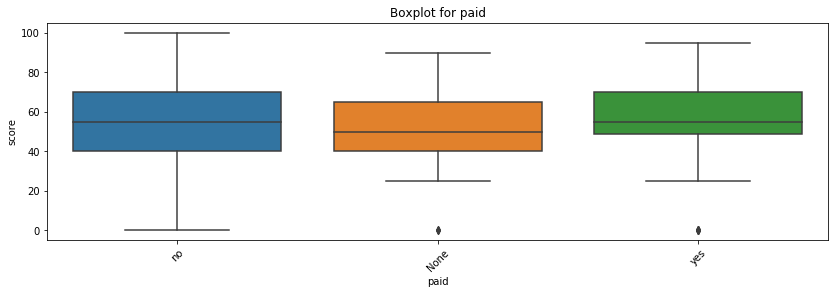

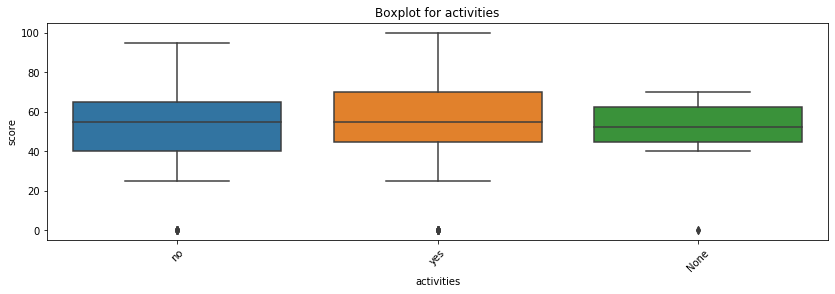

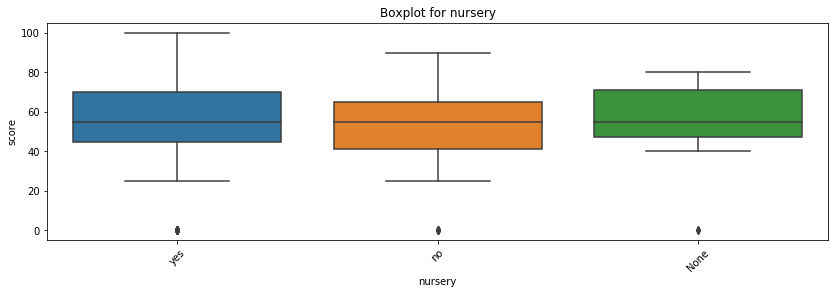

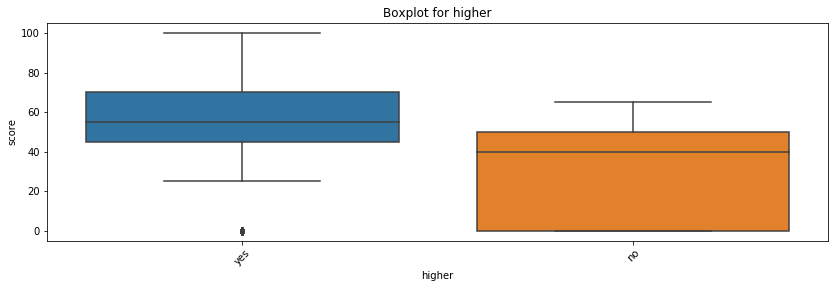

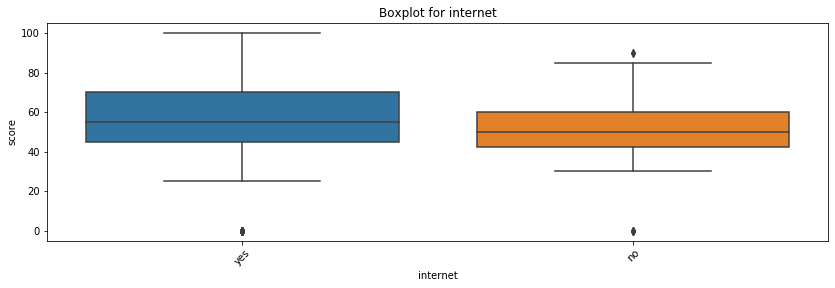

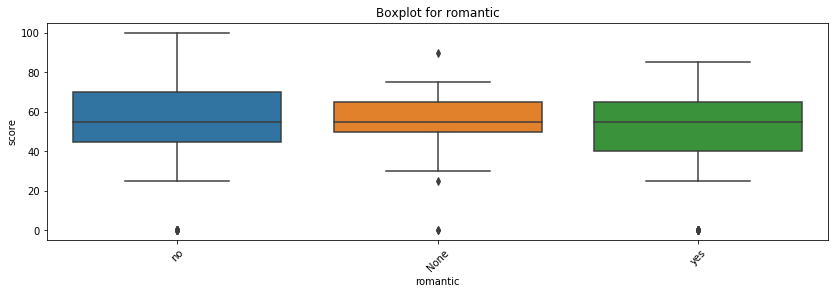

In [1015]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
            'internet', 'romantic']:
    get_boxplot(col)

бОльшая часть параметров может оказывать какое-то влияние на значение результата финального теста, но, судя по разбросам значений параметров, влияние каждого отдельного параметра - незначительно. Необходимо рассматривать только сосокупность некоторых параметров

In [1016]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1017]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
            'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [1021]:
students_model = students.loc[:, ['sex', 'higher', 'romantic', 'age', 'Medu', 'Fedu',
                                  'studytime', 'failures', 'goout']]
students_model.head(10)

sex higher romantic  age  Medu  Fedu  studytime  failures  goout
0   F    yes       no   18   4.0   4.0        2.0       0.0    4.0
1   F    yes       no   17   1.0   1.0        2.0       0.0    3.0
2   F    yes     None   15   1.0   1.0        2.0       3.0    2.0
3   F    yes      yes   15   4.0   2.0        3.0       0.0    2.0
4   F    yes       no   16   3.0   3.0        2.0       0.0    2.0
5   M    yes       no   16   4.0   3.0        2.0       0.0    2.0
6   M    yes       no   16   2.0   2.0        2.0       0.0    4.0
7   F    yes       no   17   4.0   4.0        2.0       0.0    4.0
8   M    yes       no   15   3.0   2.0        2.0       0.0    2.0
9   M    yes       no   15   3.0   4.0        2.0       0.0    1.0

<h2> Выводы </h2>

<h4> В датафрейме присутствовали столбцы с выбросами. Пустых значений мало, однако там, где они попадалиь, пустые значения заменены на None или медианные/средние значения. Достаточно высокой и однозначной крреляции параметра score от любого другого параметра нет, вероятно стоит рассматривать зависимость от нескольких параметров. Для построения модели предлагается ипользовать параметры 'sex', 'higher', 'romantic', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout', так как они умеют наибольший кф коррелиции или статистически значимые различия</h4>